In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bike_sharing.csv')

<img src="https://indigoawards.s3.amazonaws.com/store/cover/5904/image/optimal-11359559776ed50bf8043984ee3757ff.jpg"/>

<strong><h1>Yulu Case Study</h1></strong>

<h2>Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.</h2>

Column Profiling:

    datetime: datetime
    season: season (1: spring, 2: summer, 3: fall, 4: winter)
    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
    workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
    weather:
    1: Clear, Few clouds, partly cloudy, partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    temp: temperature in Celsius
    atemp: feeling temperature in Celsius
    humidity: humidity
    windspeed: wind speed
    casual: count of casual users
    registered: count of registered users
    count: count of total rental bikes including both casual and registered



In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
data.shape

(10886, 12)

In [6]:
print(f"TOTAL ROWS : {data.shape[0]}")
print(f"TOTAL COLUMNS : {data.shape[1]}")

TOTAL ROWS : 10886
TOTAL COLUMNS : 12


In [7]:
print(f"SIZE OF DataFrame : {data.size}")

SIZE OF DataFrame : 130632


In [9]:
print(f"Index of the DataFrame : {data.index}")

Index of the DataFrame : RangeIndex(start=0, stop=10886, step=1)


In [10]:
print(f"Coulumns : {data.columns}")

Coulumns : Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')


In [11]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [12]:
data.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are zero null values

In [15]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10881    False
10882    False
10883    False
10884    False
10885    False
Length: 10886, dtype: bool

In [16]:
data.duplicated().sum()

0

There are zero duplicate values

In [17]:
#Taking a copy of data into data_copy
data_copy = data.copy()

In [18]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [19]:
from scipy import stats
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [23]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    data[col] = data[col].astype('object')

In [60]:
# change of season
data['season'] = data['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [61]:
# change of holiday
data['holiday'] = data['holiday'].replace({0:'No',1:'Yes'})

In [62]:
# change of workingday
data['workingday'] = data['workingday'].replace({0:'No',1:'Yes'})

In [65]:
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day
data['hour'] = data['datetime'].dt.hour

In [66]:
# change of month
data['month'] = data['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [67]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,Spring,No,No,1,9.84,14.395,81,0.0,3,13,16,2011,January,1,0
1,2011-01-01 01:00:00,Spring,No,No,1,9.02,13.635,80,0.0,8,32,40,2011,January,1,1
2,2011-01-01 02:00:00,Spring,No,No,1,9.02,13.635,80,0.0,5,27,32,2011,January,1,2
3,2011-01-01 03:00:00,Spring,No,No,1,9.84,14.395,75,0.0,3,10,13,2011,January,1,3
4,2011-01-01 04:00:00,Spring,No,No,1,9.84,14.395,75,0.0,0,1,1,2011,January,1,4


In [68]:
data["datetime"].value_counts()

datetime
2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: count, Length: 10886, dtype: int64

In [69]:
data["season"].value_counts()

season
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

In [70]:
data["holiday"].value_counts()

holiday
No     10575
Yes      311
Name: count, dtype: int64

In [71]:
data["workingday"].value_counts()

workingday
Yes    7412
No     3474
Name: count, dtype: int64

In [72]:
data["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [73]:
data["temp"].value_counts()

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64

In [74]:
data["atemp"].value_counts()

atemp
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: count, dtype: int64

In [75]:
data["humidity"].value_counts()

humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64

In [76]:
data["windspeed"].value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

In [77]:
data["casual"].value_counts()

casual
0      986
1      667
2      487
3      438
4      354
      ... 
332      1
361      1
356      1
331      1
304      1
Name: count, Length: 309, dtype: int64

In [78]:
data["registered"].value_counts()

registered
3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: count, Length: 731, dtype: int64

In [79]:
data["count"].value_counts()

count
5      169
4      149
3      144
6      135
2      132
      ... 
801      1
629      1
825      1
589      1
636      1
Name: count, Length: 822, dtype: int64

In [95]:
data['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

In [96]:
data['month'].value_counts()

month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

In [97]:
data['day'].value_counts()

day
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: count, dtype: int64

## Univariate Analysis

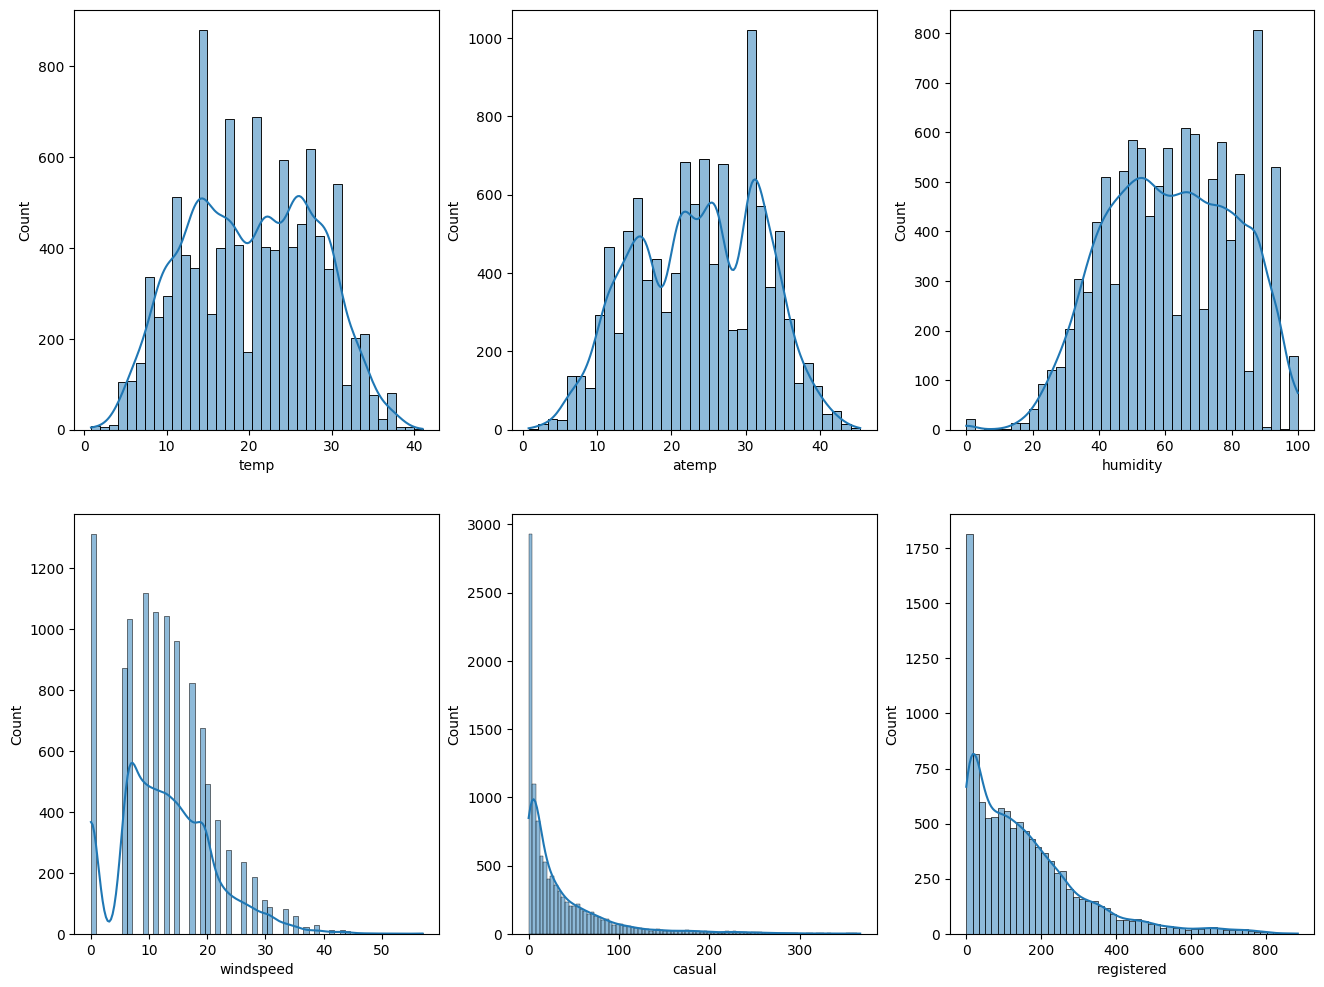

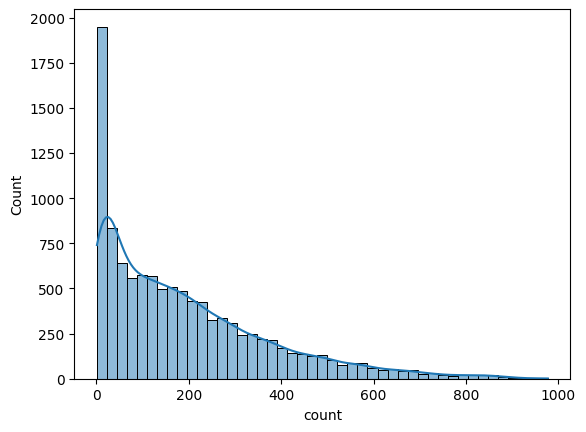

In [82]:
# understanding the distribution for numerical variables
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(data[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(data[num_cols[-1]], kde=True) 
plt.show()

1. casual, registered and count somewhat looks like Log Normal Distrinution
2. temp, atemp and humidity looks like they follows the Normal Distribution
3. windspeed follows the binomial distribution

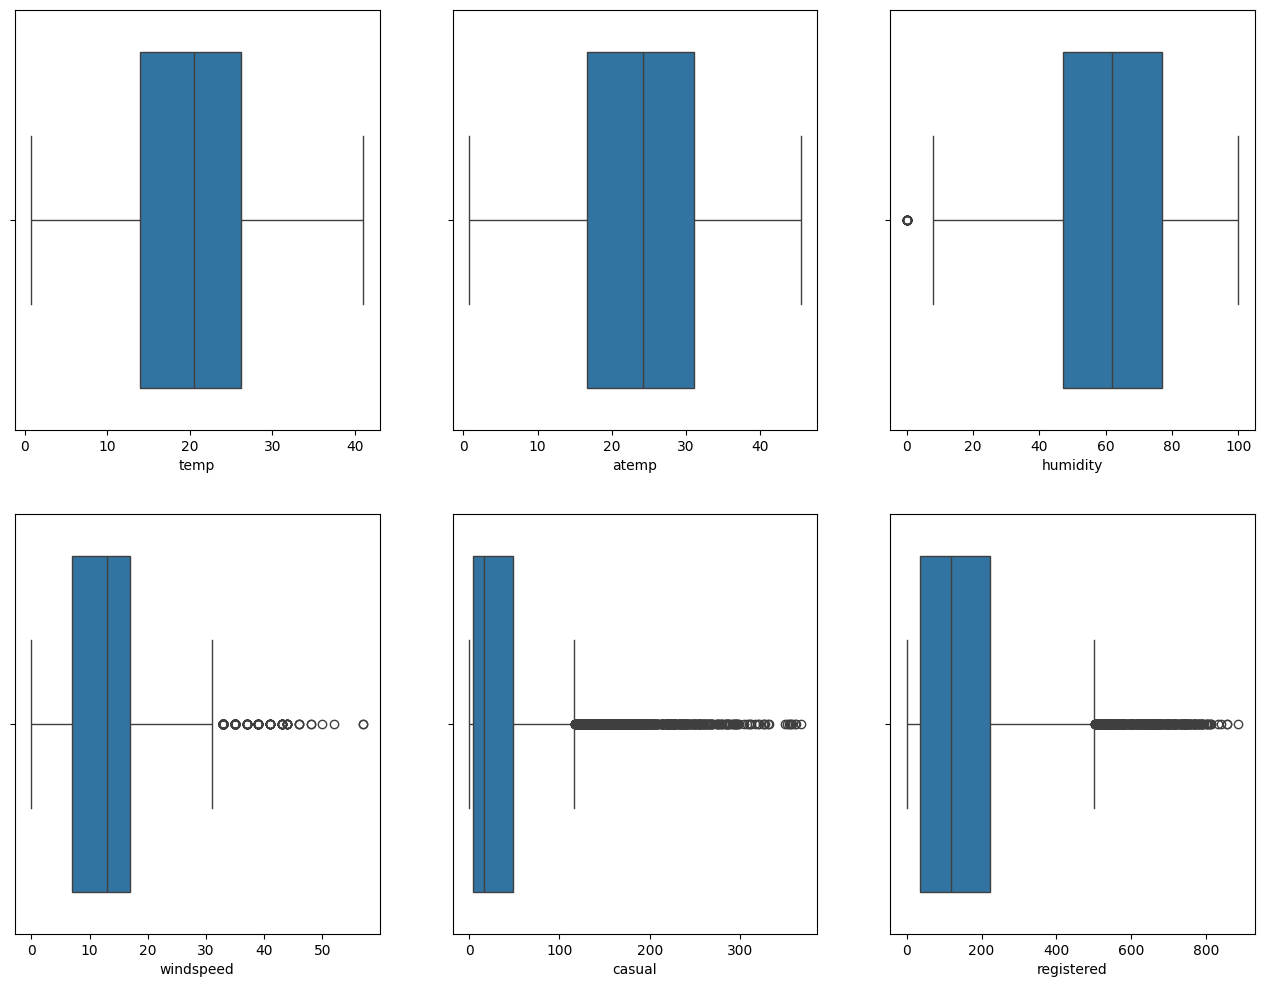

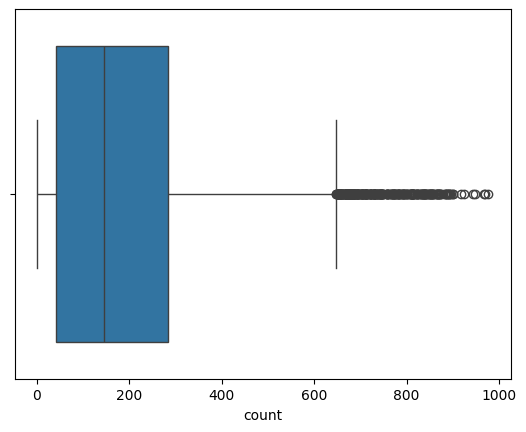

In [83]:
# plotting box plots to detect outliers in the data
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=data[num_cols[index]], ax=axis[row, col])
        index += 1
        
plt.show()
sns.boxplot(x=data[num_cols[-1]]) 
plt.show()

Looks like humidity, casual, registered and count have outliers in the data.

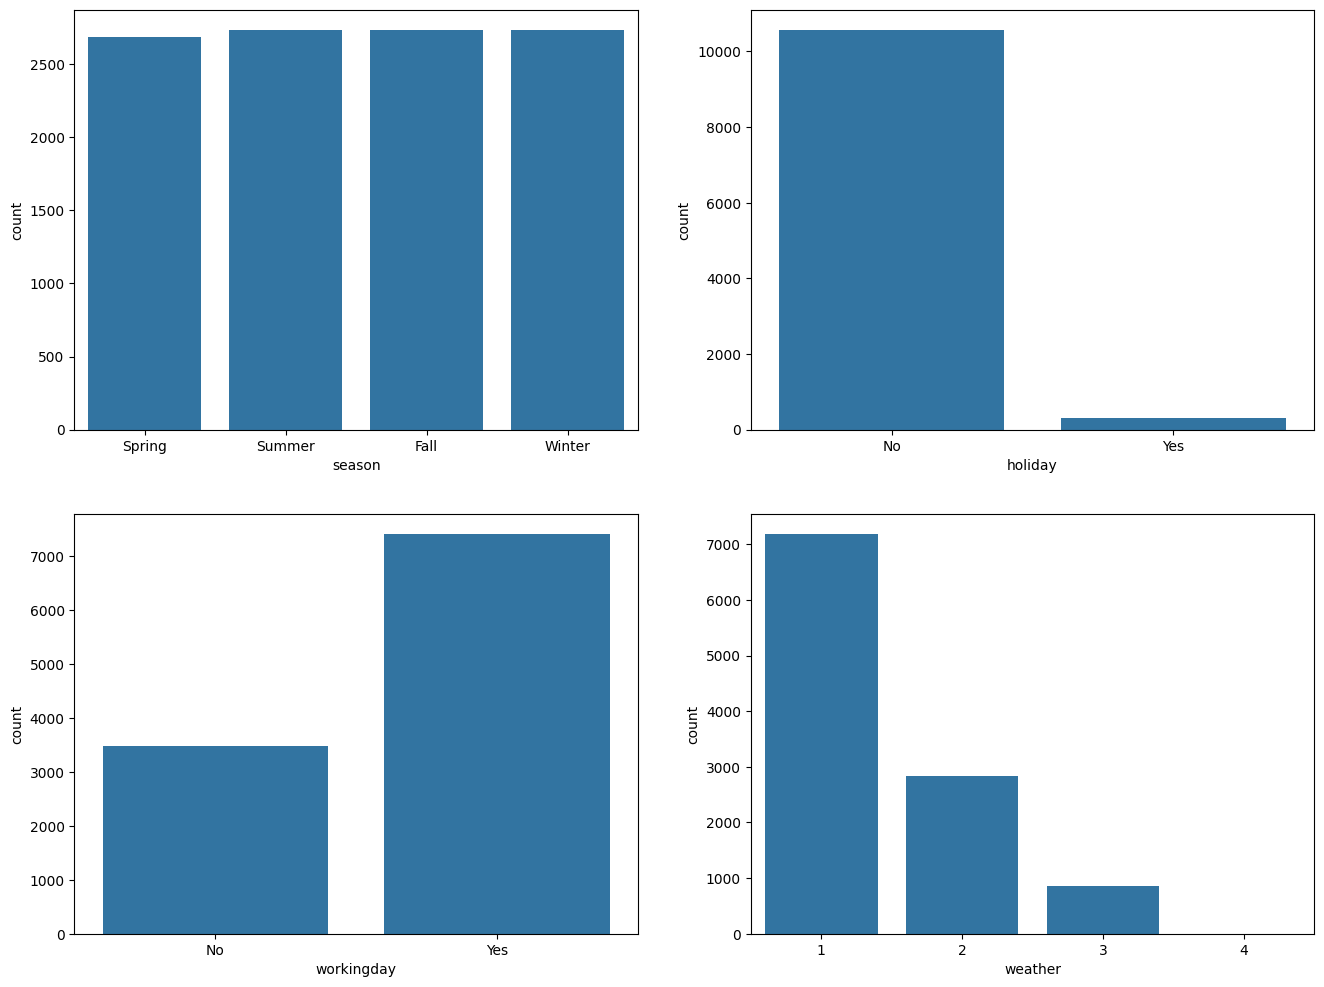

In [84]:
# countplot of each categorical column
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=data, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

Data looks common as it should be like equal number of days in each season, more working days and weather is mostly Clear, Few clouds, partly cloudy, partly cloudy.

## Bi-variate Analysis

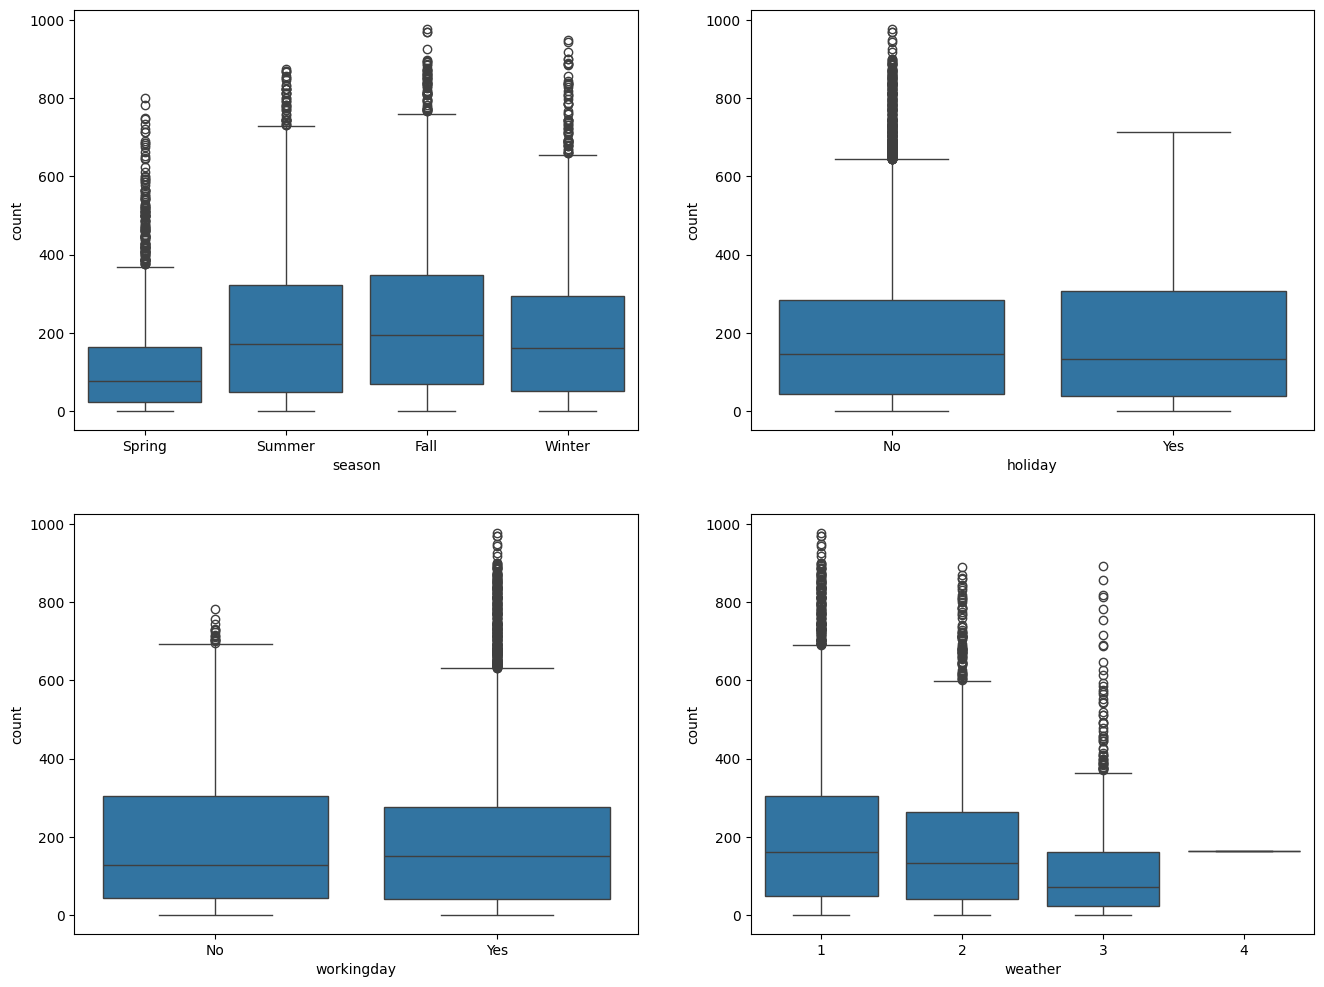

In [85]:
# plotting categorical variables againt count using boxplots
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=data, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

1. In summer and fall seasons more bikes are rented as compared to other seasons.
2. Whenever its a holiday more bikes are rented.
3. It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
4. Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented.

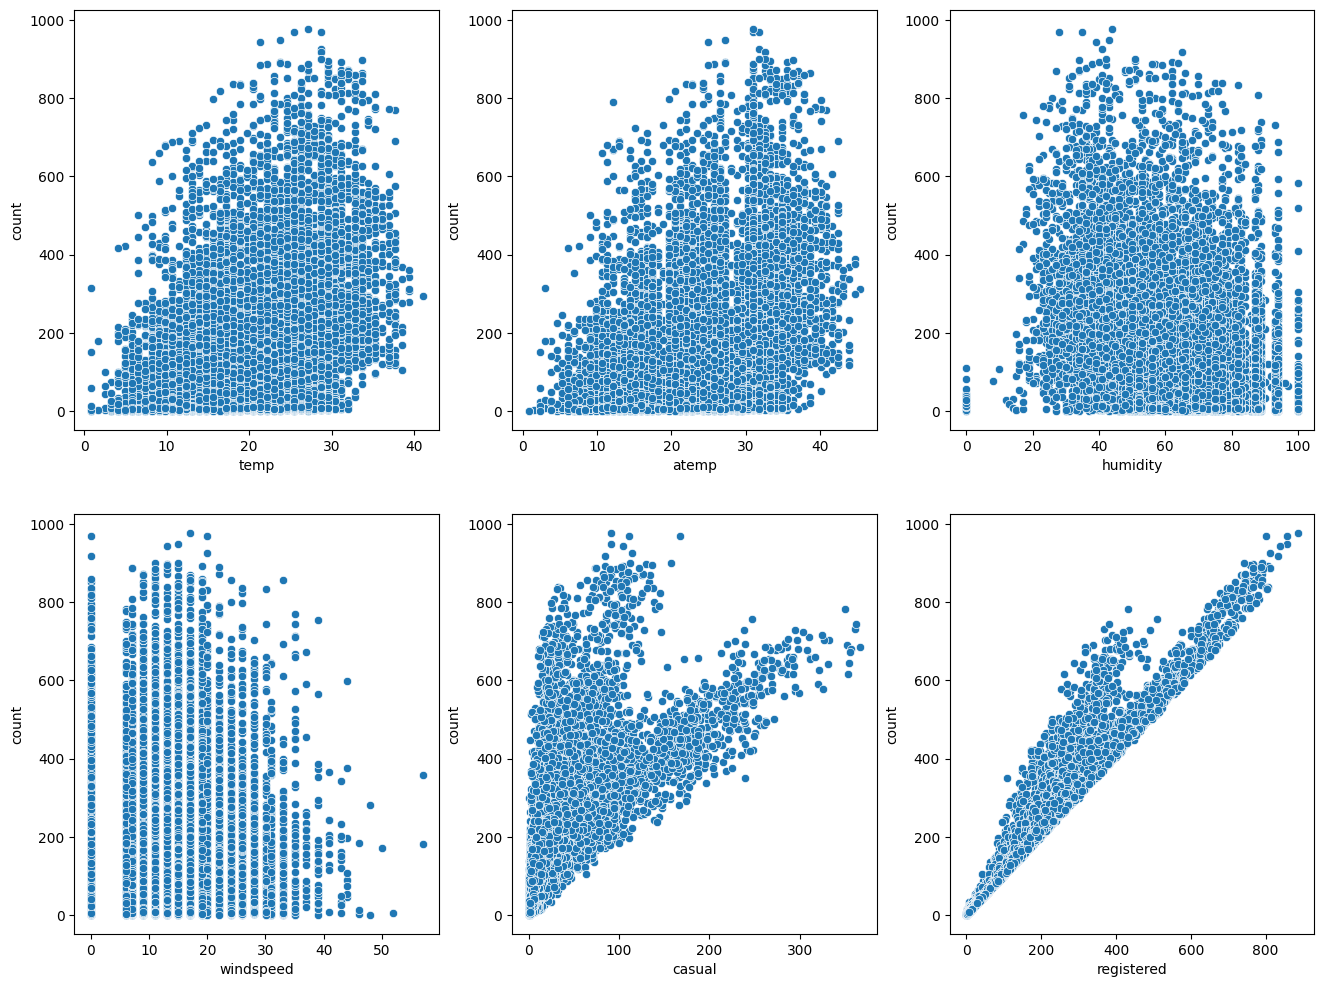

In [86]:
# plotting numerical variables againt count using scatterplot
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=data, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

1. Whenever the humidity is less than 20, number of bikes rented is very very low.
2. Whenever the temperature is less than 10, number of bikes rented is less.
3. Whenever the windspeed is greater than 35, number of bikes rented is less.

In [87]:
from scipy import stats

In [88]:
data['datetime'] = pd.to_datetime(data['datetime'])

In [89]:
data['datetime'].min(), data['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [92]:
data.skew(numeric_only = True)

temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
year         -0.007717
day           0.001182
hour         -0.009125
dtype: float64

In [100]:
# corrrelation analysis
correlation_matrix = data[["atemp", "temp", "humidity", "windspeed", "casual", "registered", "count"]].corr()
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,atemp,temp,humidity,windspeed,casual,registered,count
atemp,1.000000,0.984948,-0.043536,-0.057473,0.462067,0.314635,0.389784
temp,0.984948,1.000000,-0.064949,-0.017852,0.467097,0.318571,0.394454
humidity,-0.043536,-0.064949,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.057473,-0.017852,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.462067,0.467097,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.314635,0.318571,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.389784,0.394454,-0.317371,0.101369,0.690414,0.970948,1.000000


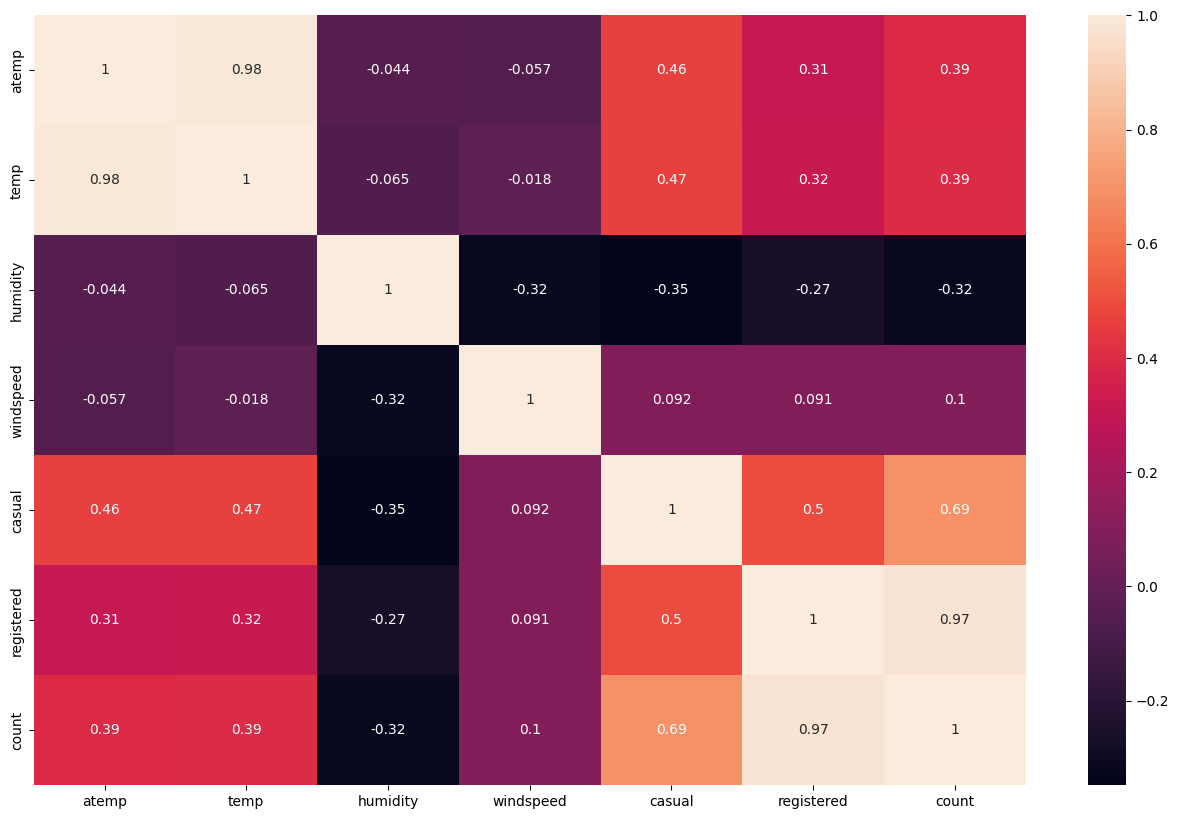

In [101]:
# correlation chart
plt.figure(figsize = (16, 10))
sns.heatmap(correlation_matrix, annot = True)
plt.show()

Correlation Analysis

Atemp:

    Strong positive correlation with 'temp' (0.98), indicating a close relationship.
    Moderate positive correlation with 'casual' (0.46) and 'registered' (0.31).
    Positive correlation with 'count' (0.39), suggesting a relationship with overall bike rentals.

Temp (Temperature):

    Highly correlated with 'atemp' (0.98), indicating a strong connection.
    Moderate positive correlation with 'casual' (0.47) and 'registered' (0.32).
    Positive correlation with 'count' (0.39), showing a relationship with overall bike rentals.

Humidity:

    Weak negative correlation with 'atemp' (-0.04) and 'temp' (-0.06).
    Moderate negative correlation with 'casual' (-0.35), 'registered' (-0.27), and 'count' (-0.32).
    Indicates a tendency for fewer bike rentals during higher humidity.

Windspeed:

    Weak negative correlation with 'atemp' (-0.06) and 'temp' (-0.02).
    Weak positive correlation with 'casual' (0.09), 'registered' (0.09), and 'count' (0.10).
    Suggests a subtle influence on bike rentals with increasing wind speed.

Casual (Casual Bike Rentals):

    Strong positive correlation with 'atemp' (0.46) and 'temp' (0.47).
    Moderate negative correlation with 'humidity' (-0.35) and positive correlation with 'windspeed' (0.09).
    Highly correlated with 'registered' (0.50) and 'count' (0.69), indicating a significant impact on overall rentals.

Registered (Registered Bike Rentals):

    Positive correlation with 'atemp' (0.31) and 'temp' (0.32).
    Negative correlation with 'humidity' (-0.27) and positive correlation with 'windspeed' (0.09).
    Highly correlated with 'casual' (0.50) and 'count' (0.97), emphasizing a substantial impact on overall rentals.

Count (Total Bike Rentals):

    Positive correlation with 'atemp' (0.39), 'temp' (0.39), and 'casual' (0.69).
    Negative correlation with 'humidity' (-0.32).
    Highly correlated with 'registered' (0.97), emphasizing the joint impact of casual and registered rentals on the overall count.

In [103]:
# counts based on months
monthly_count = data.groupby('month')['count'].sum().reset_index()
monthly_count = monthly_count.sort_values(by='count', ascending=False)
monthly_count

,month,count
6,June,220733
5,July,214617
1,August,213516
11,September,212529
10,October,207434
8,May,200147
9,November,176440
0,April,167402
2,December,160160
7,March,133501


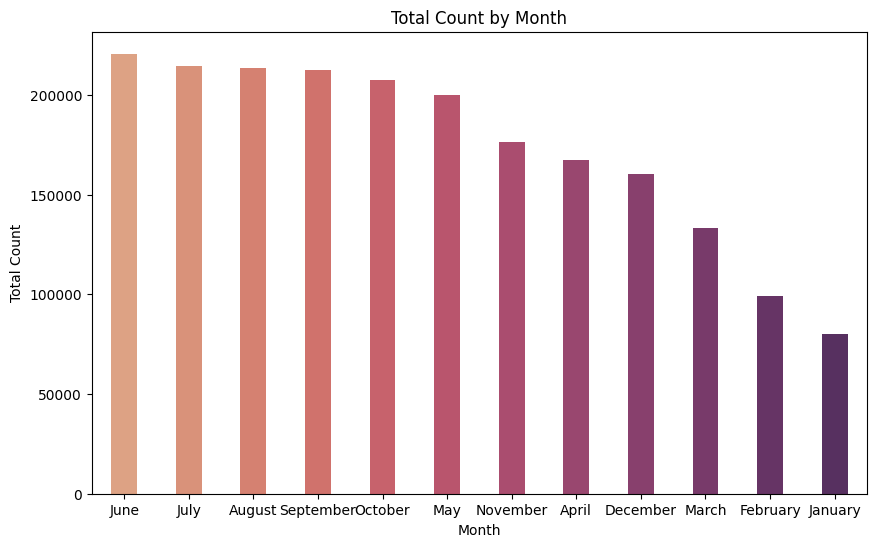

In [104]:
# rentals on monthly counts
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='count', data=monthly_count, palette='flare', width = 0.4)

plt.title('Total Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Count')
plt.show()

Monthly analysis on rentals

Peak Rental Months:

    June stands out as the peak month for bike rentals, with the highest count of 220,733, followed closely by July and August.

Seasonal Trend:

    Summer months (June, July, August) show higher bike rental counts, consistent with favorable weather conditions.

Off-Peak Rental Months:

    January, February, and March have notably lower bike rental counts, indicating potential off-peak periods, possibly influenced by colder weather or fewer outdoor activities.

In [109]:
data = pd.read_csv('bike_sharing.csv')
data_copy = data.copy()

## Hypothesis Testing - 1

<strong>Null Hypothesis:<strong> Working day has no effect on the number of cycles being rented.

<strong>Alternate Hypothesis:<strong> Working day has effect on the number of cycles being rented.

<strong>Significance level (alpha):<strong> 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [110]:
data_group1 = data_copy[data_copy['workingday']==0]['count'].values
data_group2 = data_copy[data_copy['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

Before conducting the two-sample T-Test we need to find if the given data groups have the same variance. If the ratio of the larger data groups to the small data group is less than 4:1 then we can consider that the given data groups have equal variance.

Here, the ratio is 34040.70 / 30171.35 which is less than 4:1

In [111]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

TtestResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348, df=10884.0)

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.

In [123]:
from statsmodels.graphics.gofplots import qqplot

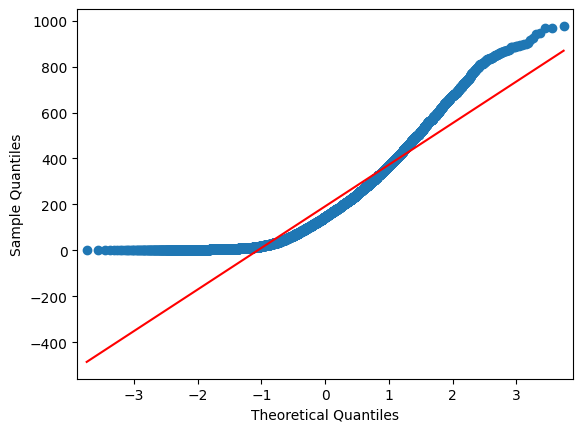

In [124]:
# QQ plot
qqplot(data['count'], line = 's')
plt.show()

<Axes: xlabel='count', ylabel='Density'>

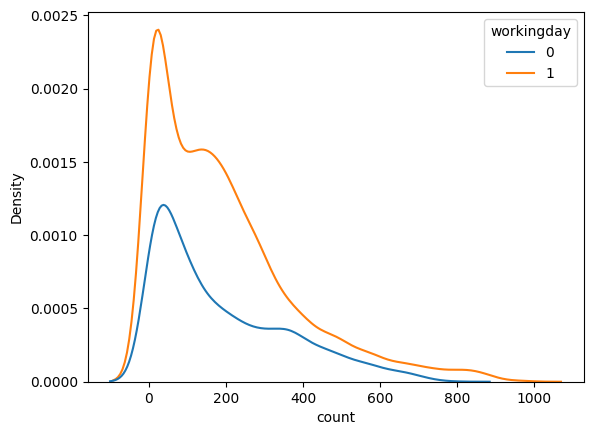

In [126]:
sns.kdeplot(data = data, x = 'count', hue = 'workingday')

<Axes: xlabel='count', ylabel='Count'>

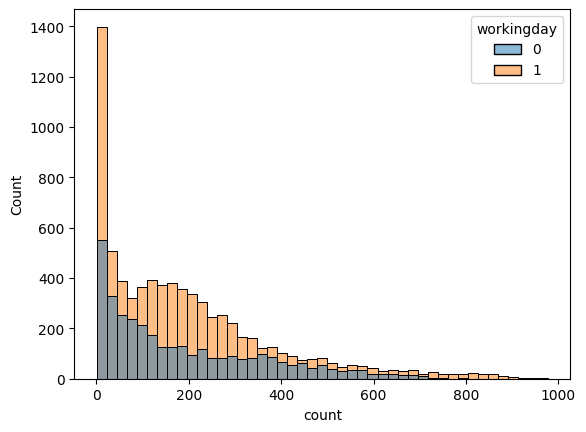

In [127]:
sns.histplot(data = data, x = 'count', hue = 'workingday')

There is no significant difference on bike rentals between working and non-working days.

## Hypothesis Testing - 2

<strong>Null Hypothesis:</strong> Number of cycles rented is similar in different weather and season.

<strong>Alternate Hypothesis:</strong> Number of cycles rented is not similar in different weather and season.

<strong>Significance level (alpha):</strong> 0.05

Here, we will use the ANOVA to test the hypothess defined above

In [114]:
gp1 = data_copy[data_copy['weather']==1]['count'].values
gp2 = data_copy[data_copy['weather']==2]['count'].values
gp3 = data_copy[data_copy['weather']==3]['count'].values
gp4 = data_copy[data_copy['weather']==4]['count'].values

gp5 = data_copy[data_copy['season']==1]['count'].values
gp6 = data_copy[data_copy['season']==2]['count'].values
gp7 = data_copy[data_copy['season']==3]['count'].values
gp8 = data_copy[data_copy['season']==4]['count'].values

In [115]:
# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

<Axes: xlabel='count', ylabel='Density'>

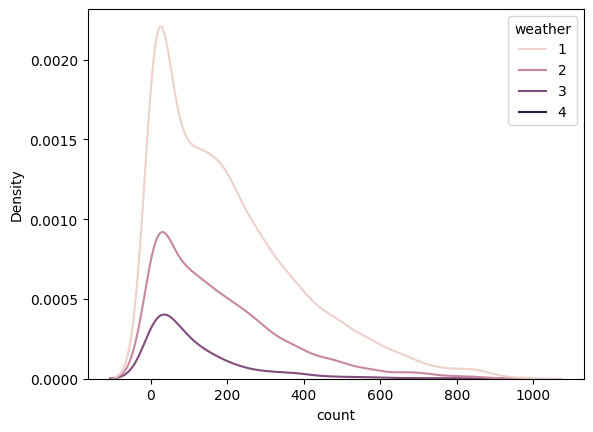

In [128]:
sns.kdeplot(data = data, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

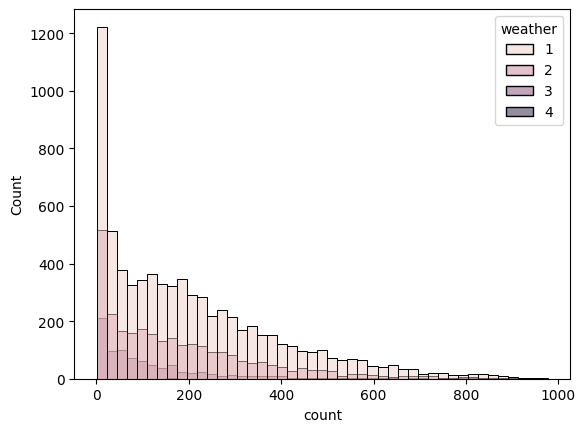

In [129]:
sns.histplot(data = data, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Density'>

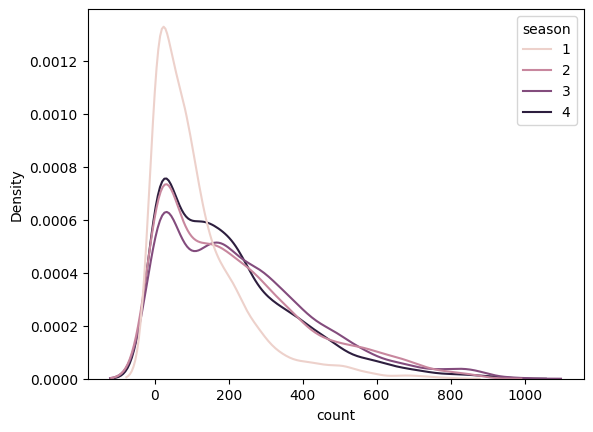

In [130]:
sns.kdeplot(data = data, x = 'count', hue = 'season')

<Axes: xlabel='count', ylabel='Count'>

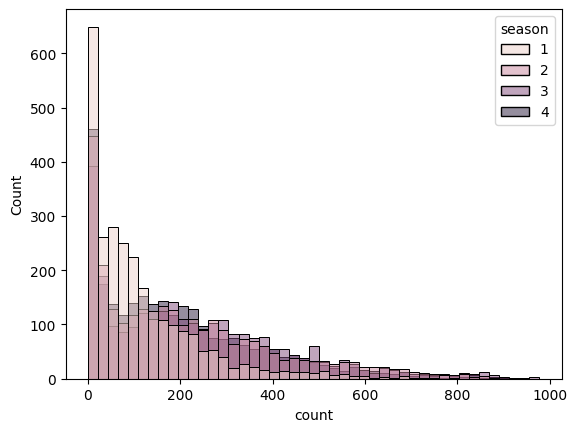

In [132]:
sns.histplot(data = data, x = 'count', hue = 'season')

There is a significant difference between demand of bicycles for different Weather conditions and Season.

## Hypothesis Testing - 3

<strong>Null Hypothesis (H0):</strong> Weather is independent of the season

<strong>Alternate Hypothesis (H1):</strong> Weather is not independent of the season

<strong>Significance level (alpha):</strong> 0.05

We will use chi-square test to test hypyothesis defined above.

In [117]:
data_table = pd.crosstab(data_copy['season'], data_copy['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [118]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [119]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.

### Insights

1. More bicycles are rented during the summer and fall seasons compared to other times of the year.
2. Bicycle rentals increase on holidays.
3. Rental numbers are slightly higher on holidays and weekends compared to regular working days.
4. Fewer bicycles are rented during adverse weather conditions such as rain, thunderstorms, snow, or fog.
5. Bike rentals are extremely low when humidity levels drop below 20%.
6. Fewer bicycles are rented when the temperature falls below 10 degrees.
7. High wind speeds exceeding 35 reduce the number of bicycles rented.

### Recommendations

1. The company should maintain a larger inventory of bicycles during the summer and fall seasons due to higher demand compared to other seasons.
2. At a significance level of 0.05, working days do not significantly impact the number of bikes rented.
3. On days with very low humidity, the company should keep fewer bikes in stock for rent.
4. When the temperature is below 10 degrees or on particularly cold days, the company should reduce the number of bikes available.
5. On days with wind speeds over 35 or during thunderstorms, the company should decrease the number of bikes in stock for rental.